# SECTION 1: OVERVIEW
We start our analysis by comparing financial inclusion across the ASEAN 5, together with Singapore. We will also compare our results with global averages.

In here, we will focus on two metrics:
1. `fiaccount_t_d`: The percentage of respondents who report having an account (by themselves or together with someone else) at a bank or another similar financial institution. This will tell us how much of the population are served in terms of banking, regardless if they have a mobile account or not.
2. `mobileaccount_t_d`: The percentage of respondents who report personally using a mobile money service in the past year. This will tell us how many have had their banking needs met using a mobile service. According to the Global Findex Database 2025, "Mobile phones and the internet are revolutionizing financial inclusion, enabling more people to access and use digital financial services to manage their financial lives."

# PRELIMINARIES

Note: this section will be redundant once we merge the notebooks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib auto

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
#Load processed datafile
df = pd.read_csv('../data/processed/global_findex_for_analysis.csv')

In [3]:
df['group']

0            all
1            all
2            all
3            all
4            all
         ...    
314    education
315    education
316    education
317    education
318    education
Name: group, Length: 319, dtype: object

In [4]:
#Filter to the entire average only (group = all)
df_filtered = df[df['group'] == 'all']

In [5]:
#Filter to relevant columns only
columns_to_use = ['countrynewwb', 'year', 'fiaccount_t_d', 'mobileaccount_t_d']
df_filtered = df_filtered[columns_to_use]

In [6]:
#Convert country names to title case
df_filtered['countrynewwb'] = df_filtered['countrynewwb'].str.title()

# COMPARING FINANCIAL INCLUSION ACROSS ASEAN (2024)
This gives us the current state of financial inclusion across ASEAN 5 + Singapore.

## HELPER FUNCTIONS

In [19]:
#Color codes
PH_COLOR = '#e74c3c'
ASEAN_COLOR = '#95a5a6'
WORLD_COLOR = '#2c3e50'

# Individual country colors
COUNTRY_COLORS = {
    'Philippines': '#e74c3c',    # Red
    'Indonesia': '#3498db',      # Blue
    'Malaysia': '#2ecc71',       # Green
    'Singapore': '#9b59b6',      # Purple
    'Thailand': '#f39c12',       # Orange
    'Viet Nam': '#1abc9c'        # Teal
}

In [7]:
#Function for color scheme to differentiate PH
def get_colors(dataframe):
    '''
    Assigns colors to countries in the dataframe to highlight Philippines.
    
    Parameters:
    -----------
    dataframe : pandas.DataFrame
        A dataframe containing a 'countrynewwb' column with country names.
    
    Returns:
    --------
    list
        A list of color codes where Philippines is colored with PH_COLOR
        and all other countries are colored with ASEAN_COLOR.
    '''
    colors = []
    for country in dataframe['countrynewwb']:
        if country == 'Philippines':
            colors.append(PH_COLOR)
        else:
            colors.append(ASEAN_COLOR)
    return colors

In [20]:
def get_country_color(country_name):
    """
    Returns color for a single country. If the country is not found in
    the dictionary, it returns the default ASEAN_COLOR.

    Parameters:
    -----------
    country_name : str
        The name of the country (e.g., 'Philippines', 'Indonesia').
    
    Returns:
    --------
    str
        A hexadecimal color code. Returns the country's specific color if 
        found in COUNTRY_COLORS, otherwise returns ASEAN_COLOR as default.
    """
    return COUNTRY_COLORS.get(country_name, ASEAN_COLOR)

In [9]:
#Filter to 2024 data only
df_2024 = df_filtered[df_filtered['year'] == 2024].copy()

In [10]:
#Check data
df_2024

,countrynewwb,year,fiaccount_t_d,mobileaccount_t_d
18,Indonesia,2024,0.523919,0.220129
19,Malaysia,2024,0.871831,0.445049
20,Philippines,2024,0.335357,0.288000
21,Singapore,2024,0.978191,0.564690
22,Thailand,2024,0.911189,0.416774
23,Viet Nam,2024,0.698542,0.387233
276,World,2024,0.753074,0.159704


In [11]:
#Separate ASEAN countries from world
df_2024_asean = df_2024[df_2024['countrynewwb'] != 'World'].copy()
df_2024_world = df_2024[df_2024['countrynewwb'] == 'World'].copy()

In [12]:
#Sort by financial account % in preparation for visualization
df_2024_asean_fi = df_2024_asean.sort_values('fiaccount_t_d', ascending=True)
df_2024_asean_mobile = df_2024_asean.sort_values('mobileaccount_t_d', ascending=True)

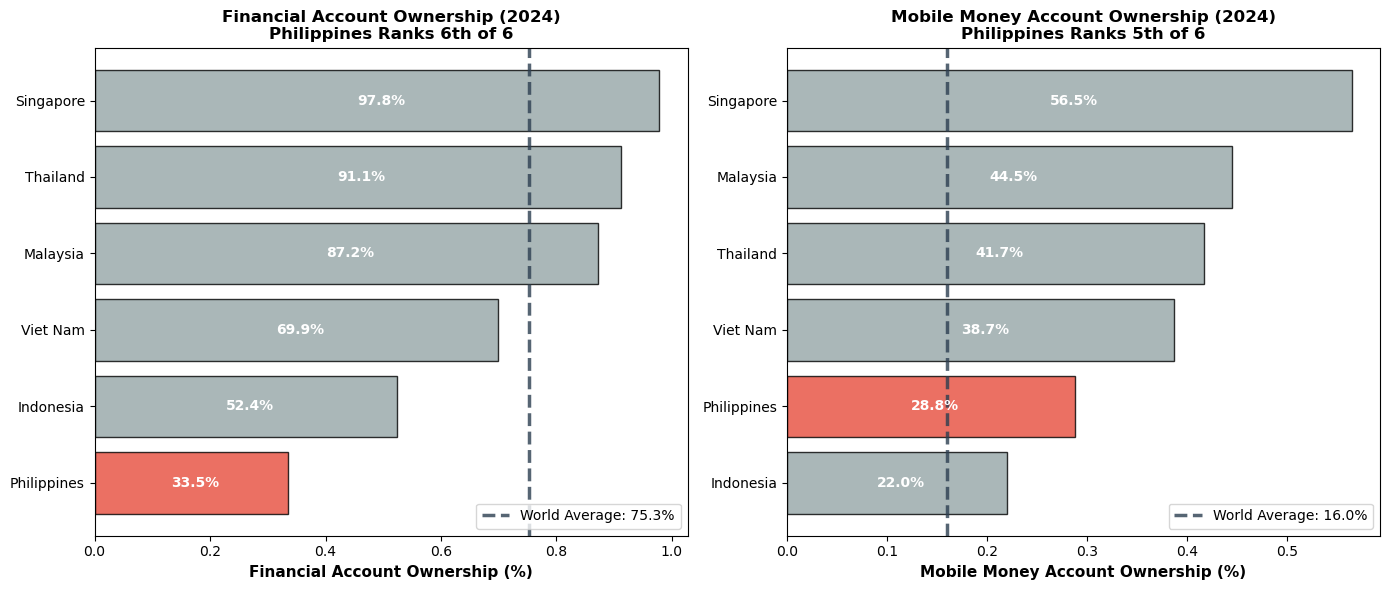

In [13]:
#Creating horizontal bar charts for comparison (side-by-side)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1, ax2 = axes

#Get world averages:
world_fi = df_2024_world['fiaccount_t_d'].values[0]
world_mobile = df_2024_world['mobileaccount_t_d'].values[0]

#Colors for FI Account
colors_fi = get_colors(df_2024_asean_fi)

#FI account percentage bar chart
bar_1 = ax1.barh(df_2024_asean_fi['countrynewwb'], df_2024_asean_fi['fiaccount_t_d'],
         color=colors_fi, alpha=0.8, edgecolor='black', linewidth=1)

#World average line
ax1.axvline(world_fi, color=WORLD_COLOR, linestyle='--',
           linewidth=2.5, label=f'World Average: {world_fi:.1%}', alpha=0.8)

#Formatting
ax1.set_xlabel('Financial Account Ownership (%)', fontweight='bold', fontsize=11)
ax1.bar_label(bar_1, fmt=lambda x: f'{x:.1%}', padding=3, label_type='center',
             color='white', fontweight='bold')
ax1.set_title('Financial Account Ownership (2024)\nPhilippines Ranks 6th of 6', 
              fontweight='bold', fontsize=12)

ax1.legend(loc='lower right')

#Colors for Mobile account
colors_mobile = get_colors(df_2024_asean_mobile)

#Mobile account percentage bar chart
bar_2 = ax2.barh(df_2024_asean_mobile['countrynewwb'], df_2024_asean_mobile['mobileaccount_t_d'],
         color=colors_mobile, alpha=0.8, edgecolor='black', linewidth=1)
ax2.axvline(world_mobile, color=WORLD_COLOR, linestyle='--',
            linewidth=2.5, label=f'World Average: {world_mobile:.1%}', alpha=0.8)
ax2.set_xlabel('Mobile Money Account Ownership (%)', fontweight='bold', fontsize=11)
ax2.bar_label(bar_2, fmt=lambda x: f'{x:.1%}', padding=3, label_type='center',
             color='white', fontweight='bold')
ax2.set_title('Mobile Money Account Ownership (2024)\nPhilippines Ranks 5th of 6', 
              fontweight='bold', fontsize=12)

ax2.legend(loc='lower right')

plt.tight_layout()

## INSIGHTS HERE

# FINANCIAL ACCOUNT VERSUS MOBILE ACCOUNT OWNERSHIP
Is mobile account a substitute for having a traditional bank account?

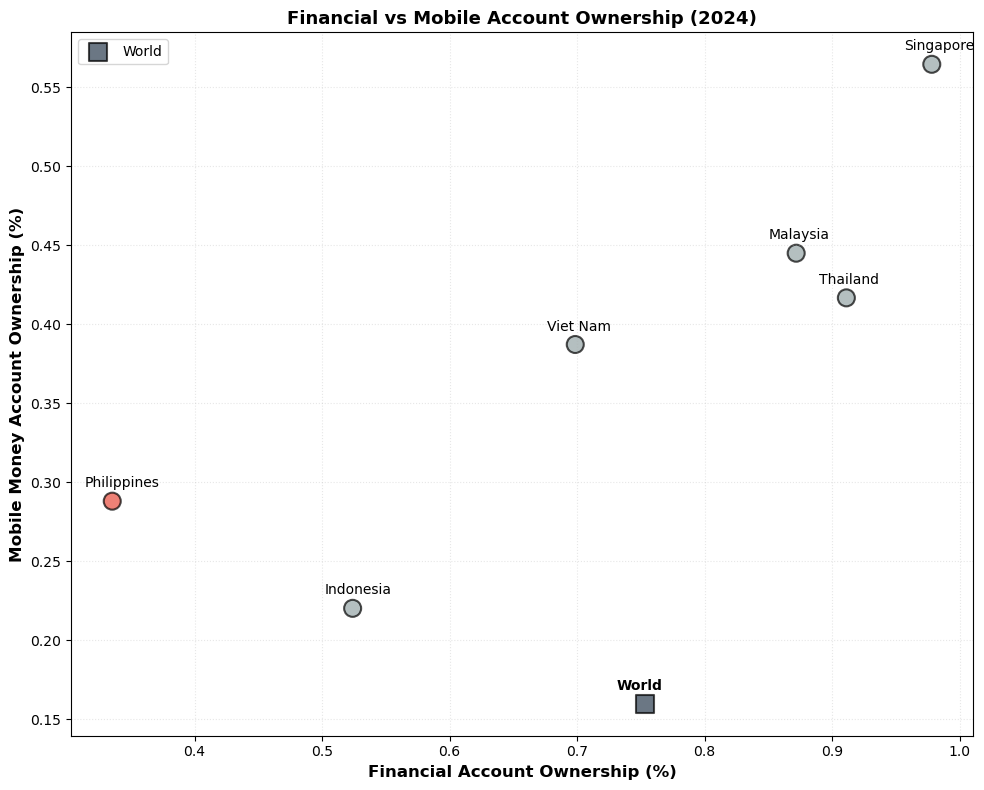

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

#Get colors
colors_scatter = get_colors(df_2024_asean)

#Asean countries
ax.scatter(df_2024_asean['fiaccount_t_d'], df_2024_asean['mobileaccount_t_d'],
           alpha=0.7, c=colors_scatter, edgecolor='black', s=150,
           linewidth=1.5)

#Plot world 2024
ax.scatter(df_2024_world['fiaccount_t_d'], df_2024_world['mobileaccount_t_d'],
           alpha=0.7, c=WORLD_COLOR, edgecolor='black', s=150, marker='s',
           label='World', linewidth=1.5)

#Country labels
for index, row in df_2024_asean.iterrows():
    ax.annotate(row['countrynewwb'],
                xy=(row['fiaccount_t_d'], row['mobileaccount_t_d']),
                xytext=(-20,10),
                textcoords='offset points',
                fontsize=10)

# Add World label
ax.annotate('World',
            xy=(df_2024_world['fiaccount_t_d'].values[0], 
                df_2024_world['mobileaccount_t_d'].values[0]),
            xytext=(-20, 10), textcoords='offset points',
            fontsize=10, fontweight='bold')

# Formatting
ax.set_xlabel('Financial Account Ownership (%)', fontweight='bold', fontsize=12)
ax.set_ylabel('Mobile Money Account Ownership (%)', fontweight='bold', fontsize=12)
ax.set_title('Financial vs Mobile Account Ownership (2024)',
             fontweight='bold', fontsize=13)

ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
ax.legend(loc='best', fontsize=10)

plt.tight_layout()

## INSIGHT HERE

# FINANCIAL ACCOUNT OWNERSHIP IN THE LAST 10 YEARS

In [34]:
#Get historical FI progression for ASEAN
df_asean = df_filtered[df_filtered['countrynewwb'] != 'World'].copy()
df_world = df_filtered[df_filtered['countrynewwb'] == 'World'].copy()

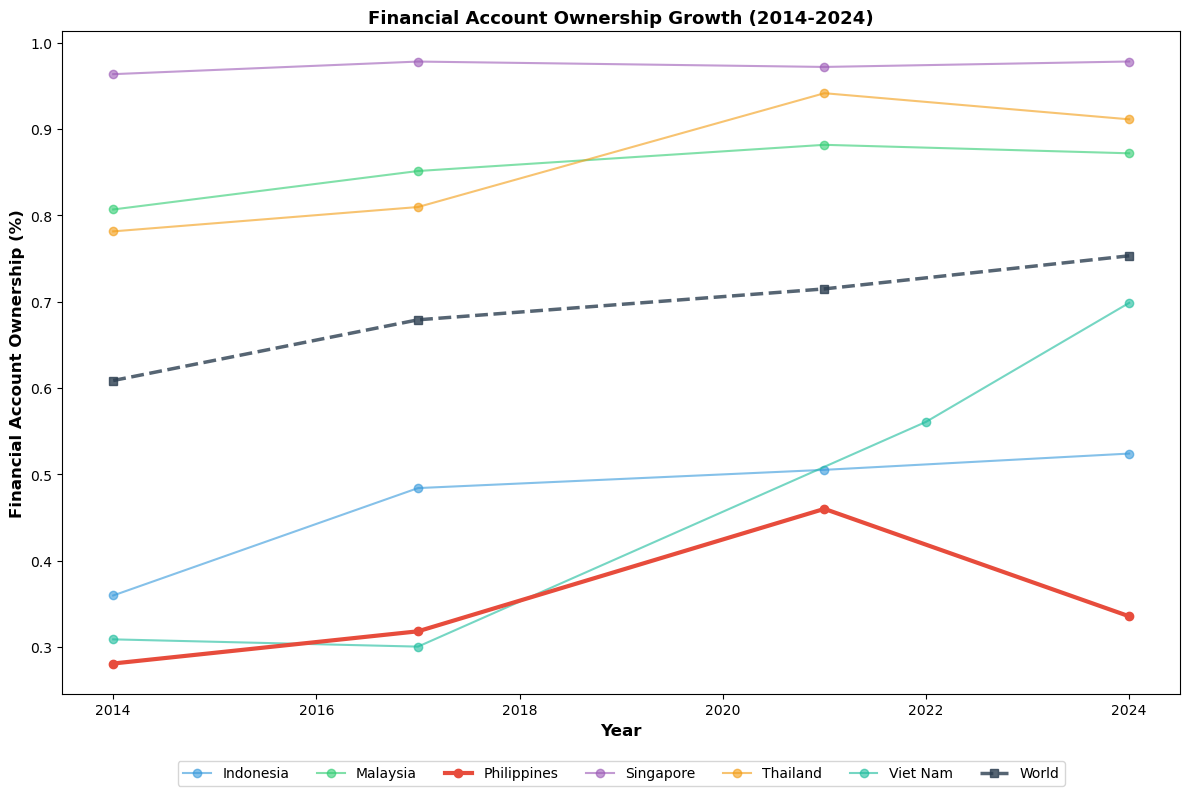

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))

#Plot lines for each country
for country in df_asean['countrynewwb'].unique():
    country_data = df_asean[df_asean_fi['countrynewwb'] == country].sort_values('year')
    color = get_country_color(country)

    if country == 'Philippines':
        linewidth = 3
        alpha = 1.0
        zorder = 3
    else:
        linewidth = 1.5
        alpha = 0.6
        zorder = 2

    ax.plot(country_data['year'], country_data['fiaccount_t_d'],
            marker='o', linewidth=linewidth, alpha=alpha, color=color,
            label=country, zorder=zorder)

# Plot World average
ax.plot(df_world['year'], df_world['fiaccount_t_d'],
        marker='s', linewidth=2.5, color=WORLD_COLOR, linestyle='--',
        label='World', alpha=0.8, zorder=4)

# Formatting
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Financial Account Ownership (%)', fontweight='bold', fontsize=12)
ax.set_title('Financial Account Ownership Growth (2014-2024)',
             fontweight='bold', fontsize=13)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10)

plt.tight_layout()

## INSIGHT HERE

# MOBILE ACCOUNT OWNERSHIP IN THE LAST 10 YEARS

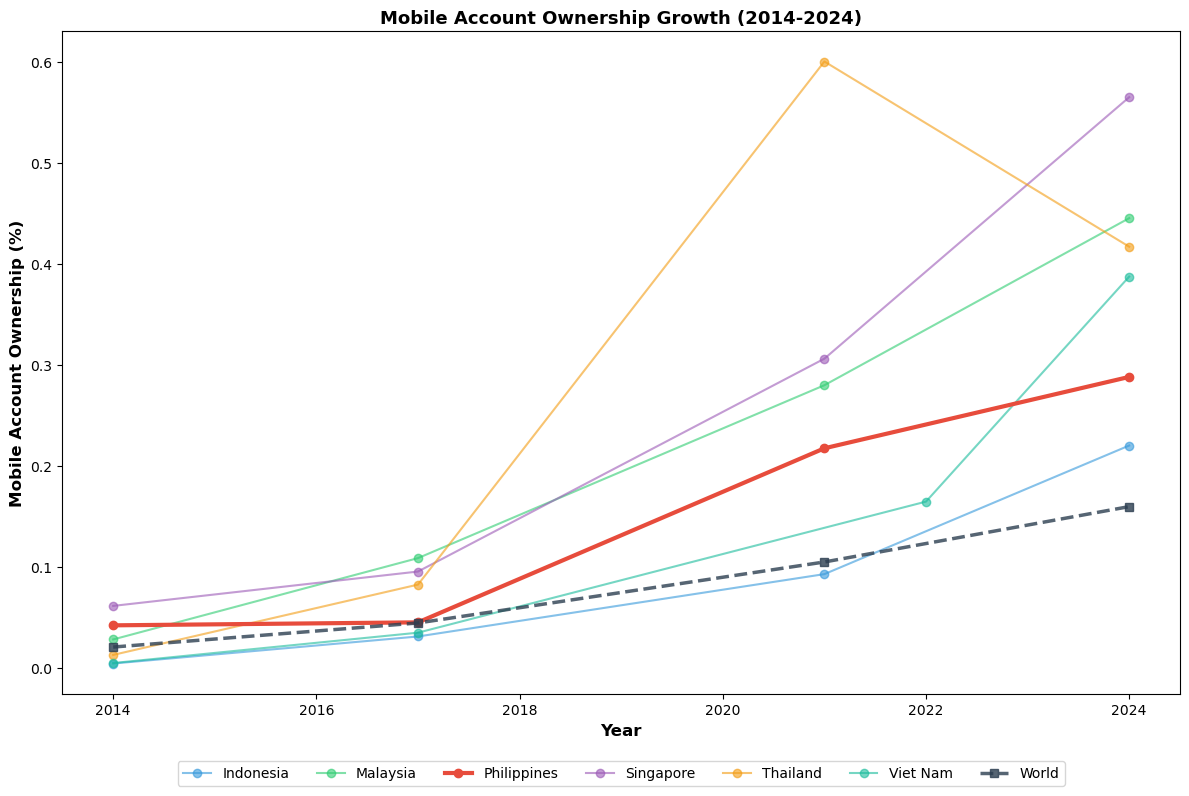

In [36]:
# MOBILE ACCOUNT OWNERSHIP IN THE LAST 10 YEARS
fig, ax = plt.subplots(figsize=(12, 8))

#Plot lines for each country
for country in df_asean_fi['countrynewwb'].unique():
    country_data = df_asean_fi[df_asean_fi['countrynewwb'] == country].sort_values('year')
    color = get_country_color(country)

    if country == 'Philippines':
        linewidth = 3
        alpha = 1.0
        zorder = 3
    else:
        linewidth = 1.5
        alpha = 0.6
        zorder = 2

    ax.plot(country_data['year'], country_data['mobileaccount_t_d'],
            marker='o', linewidth=linewidth, alpha=alpha, color=color,
            label=country, zorder=zorder)

# Plot World average
ax.plot(df_world_fi['year'], df_world_fi['mobileaccount_t_d'],
        marker='s', linewidth=2.5, color=WORLD_COLOR, linestyle='--',
        label='World', alpha=0.8, zorder=4)

# Formatting
ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Mobile Account Ownership (%)', fontweight='bold', fontsize=12)
ax.set_title('Mobile Account Ownership Growth (2014-2024)',
             fontweight='bold', fontsize=13)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10)

plt.tight_layout()

## INSIGHT HERE